In [78]:
from sklearn.datasets import fetch_openml

In [79]:
mnist=fetch_openml('mnist_784',version=1,as_frame=False)
print(type(mnist))

/home/unknown/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<class 'sklearn.utils._bunch.Bunch'>


In [80]:
x, y = mnist['data'], mnist['target']
print(x.shape)

(70000, 784)


In [81]:
x[0].shape

(784,)

In [82]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [83]:
y.shape

(70000,)

In [84]:
import matplotlib as map
import matplotlib.pyplot as plt
some_image = x[0]
some_imagers = some_image.reshape(28,28)

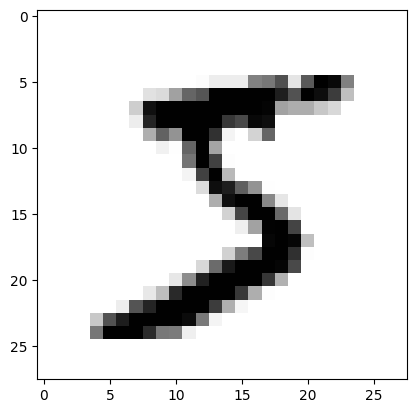

In [85]:
plt.imshow(some_imagers,cmap=map.cm.binary)

In [86]:
import numpy as np
y=y.astype(np.uint8)

In [87]:
x_train, x_test, y_train, y_test = x[:60000],x[60000:], y[:60000], y[60000:]

In [88]:
y_train5= (y_train==5)
y_test5= (y_test==5)

In [89]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=33)

In [90]:
sgd_clf.fit(x_train,y_train5)

SGDClassifier(random_state=33)

In [91]:
sgd_clf.predict([some_image])

array([ True])

In [92]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train5,cv=3,scoring='accuracy')

array([0.913  , 0.9674 , 0.95865])

In [93]:
from sklearn.model_selection import cross_val_predict

In [94]:
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train5,cv=3)

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
cm=confusion_matrix(y_train5,y_train_pred)

In [97]:
# Precision
cm[1,1]/(cm[1,1]+cm[0,1])

0.6824660258534968

In [98]:
# Recall
cm[1,1]/(cm[1,1]+cm[1,0])

0.7596384430916805

In [99]:
from sklearn.metrics import f1_score

In [100]:
f1_score(y_train5,y_train_pred)

0.7189873417721518

In [101]:
# F1 Score

2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0])

0.7189873417721518

**Precision/Recall Trade Off**

In [102]:
y_score = sgd_clf.decision_function([some_image])
threshold=0
y_score_pred= y_score>threshold
print(y_score_pred)

[ True]


In [103]:
y_score

array([232.01620976])

In [104]:
y_scores = cross_val_predict(sgd_clf,x_train,y_train5,cv=3,method='decision_function')

In [105]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train5,y_scores)

In [111]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]
recall_90_precision = recalls[np.argmax(precisions>=0.9)]

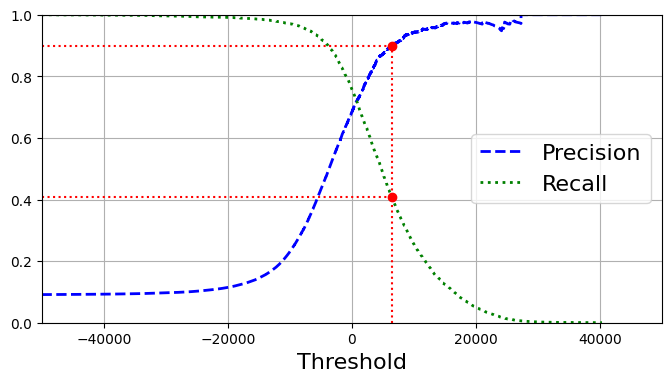

In [112]:
def plot_precision_recall_vs_threshold(precions, recalls, thresholds):
    plt.plot(thresholds, precions[:-1],"b--",label="Precision",linewidth=2)
    plt.plot(thresholds, recalls[:-1],"g:",label="Recall",linewidth=2)
    plt.legend(loc="center right",fontsize=16)
    plt.xlabel("Threshold",fontsize=16)
    plt.grid(True)
    plt.axis([-50000,50000,0,1])

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.plot([threshold_90_precision,threshold_90_precision],[0.,0.9],"r:")
plt.plot([-50000, threshold_90_precision],[0.9,0.9],"r:")
plt.plot([-50000, threshold_90_precision],[recall_90_precision,recall_90_precision],"r:")
plt.plot([threshold_90_precision],[0.9],"ro")
plt.plot([threshold_90_precision],[recall_90_precision],"ro")

plt.show()



In [108]:
precision_at_20000 = precisions[np.argmax(threshold==20000)]
precision_at_20000

0.09035

In [113]:
recall_90_precision = recalls[np.argmax(precisions>=0.9)]

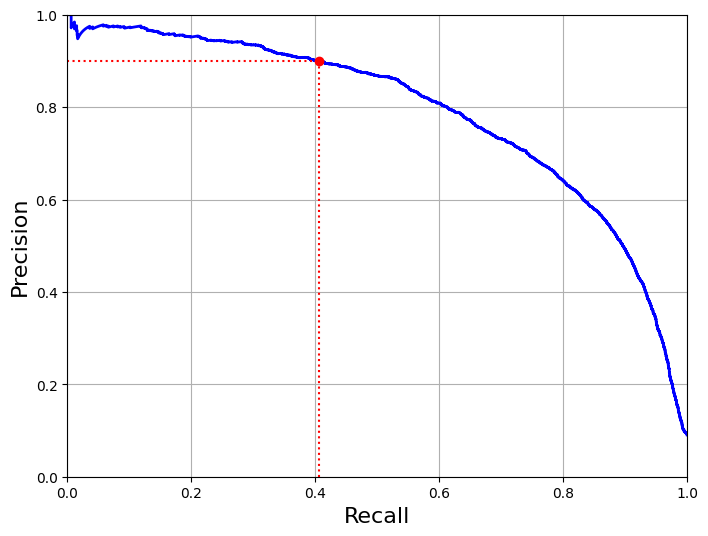

In [114]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls,precisions,"b-",linewidth=2)
    plt.xlabel("Recall",fontsize=16)
    plt.ylabel("Precision",fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)

plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions,recalls)
plt.plot([recall_90_precision, recall_90_precision],[0.,0.9],"r:")
plt.plot([0.0,recall_90_precision],[0.9,0.9],"r:")
plt.plot([recall_90_precision],[0.9],"ro")
plt.show()


In [117]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]
threshold_90_precision

6492.96635348189

In [120]:
y_pred_prec_90 = (y_scores > threshold_90_precision)
y_pred_prec_90

array([ True, False, False, ..., False, False, False])